<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/test_ground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Table of Contents:

- [Face Recognition](#intro)
- [Plotly](#plotly)

In [0]:
import google 

google.colab.files.__file__.capitalize()
#dir()
#dir(google.api)

'/usr/local/lib/python3.6/dist-packages/google/colab/files.py'

#Altair tests

In [0]:
import altair as alt
from vega_datasets import data

source = data.population.url

pink_blue = alt.Scale(domain=('Male', 'Female'),
                      range=["steelblue", "salmon"])

slider = alt.binding_range(min=1900, max=2000, step=10)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2000})

alt.Chart(source).mark_bar().encode(
    x=alt.X('sex:N', title=None),
    y=alt.Y('people:Q', scale=alt.Scale(domain=(0, 12000000))),
    color=alt.Color('sex:N', scale=pink_blue),
    column='age:O'
).properties(
    width=20
).add_selection(
    select_year
).transform_calculate(
    "sex", alt.expr.if_(alt.datum.sex == 1, "Male", "Female")
).transform_filter(
    select_year
).configure_facet(
    spacing=8
)

<a name='plotly'></a>
#Plotly tests


In [0]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

In [0]:
enable_plotly_in_cell()
import plotly.offline as py
import plotly.graph_objs as go

import numpy as np

s = np.linspace(0, 2 * np.pi, 240)
t = np.linspace(0, np.pi, 240)
tGrid, sGrid = np.meshgrid(s, t)

r = 2 + np.sin(7 * sGrid + 5 * tGrid)  # r = 2 + sin(7s+5t)
x = r * np.cos(sGrid) * np.sin(tGrid)  # x = r*cos(s)*sin(t)
y = r * np.sin(sGrid) * np.sin(tGrid)  # y = r*sin(s)*sin(t)
z = r * np.cos(tGrid)                  # z = r*cos(t)

surface = go.Surface(x=x, y=y, z=z)
data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)#, filename='jupyter-parametric_plot')

In [0]:
enable_plotly_in_cell()
import plotly.offline as py
import numpy as np

data = [dict(
        visible = False,
        line=dict(color='#ff0000', width=6),
        name = '𝜈 = '+str(step),
        x = np.arange(0,10,0.01),
        y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]
data[10]['visible'] = True

steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout = dict(sliders=sliders)
fig = dict(data=data, layout=layout)

py.iplot(fig)#, filename='Sine Wave Slider')

In [0]:
enable_plotly_in_cell()
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

init_notebook_mode(connected=False)

figure = {'data': [{'x': [0, 1, 2], 'y': [0, 1, 3]}],
          'layout': {'xaxis': {'range': [0, 5], 'autorange': False},
                     'yaxis': {'range': [0, 5], 'autorange': False},
                     'title': 'Start Title',
                     'updatemenus': [{'type': 'buttons',
                                      'buttons': [{'label': 'Play',
                                                   'method': 'animate',
                                                   'args': [None]}]}]
                    },
          'frames': [{'data': [{'x': [1, 2, 2], 'y': [1, 2, 3]}]},
                     {'data': [{'x': [1, 4, 2], 'y': [1, 4, 3]}]},
                     {'data': [{'x': [3, 4, 2], 'y': [3, 4, 3]}],
                      'layout': {'title': 'End Title'}}]}

iplot(figure)

In [0]:
enable_plotly_in_cell()
import plotly.offline as py
import plotly.graph_objs as go

trace = go.Heatmap(z=[[1, 20, 30],
                      [20, 1, 60],
                      [30, 60, 1]])
data=[trace]
py.iplot(data, filename='basic-heatmap')

# IPyWidgets tests

In [0]:
import ipywidgets as widgets

widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

In [0]:
a = widgets.IntSlider(description='a')
b = widgets.IntSlider(description='b')
c = widgets.IntSlider(description='c')
def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b, c]), out])

#Python plus JS tests

In [0]:
import numpy as np

f_w = 5
f_h = 5
mines = [[i+j for i in range(f_w)] for j in range(f_h)]
field = [[-1 for i in range(f_w)] for j in range(f_h)]

style_str = '''
<style>
   div { 
    font-size: 120%; 
    font-family: Verdana, Arial, Helvetica, sans-serif; 
    color: #333366; 
    width:  30px;
    height: 30px;
    background-color: RGB(50, 255, 50);
   }
  </style>
'''


import IPython
from google.colab import output

def generate_grid_html(w, h, fld):
  s = style_str
  s += '<table>\n'
  for y in range(h):
    s += '\t<tr>\n'
    for x in range(w):
      s += '\t\t<td>'
      if fld[y][x] == -1:
        s += '<div '
        s += 'onclick=\"google.colab.kernel.invokeFunction(\'notebook.FieldClick\', ['
        s += str(x) + ',' + str(y) 
        s += ' ], {})\"></div>'
      else:
        s += str(fld[y][x])
      s += '</td>\n'
    s += '\t</tr>\n'
  s += '</table>'
  #print(s)
  return s
  

display(IPython.display.HTML(generate_grid_html(f_w, f_h, field)))


def field_click(x, y):
  field[y][x] = mines[y][x]
  output.clear(wait=False)
  display(IPython.display.HTML(generate_grid_html(f_w, f_h, field)))

output.register_callback('notebook.FieldClick', field_click)

In [0]:
from IPython.core.magic import  Magics, magics_class, cell_magic, line_magic

class B(dict):
    def __getattr__(self, name):
        return self.__getitem__(name)

@magics_class
class StoreSQL(Magics):

    def __init__(self, shell=None,  **kwargs):
        super().__init__(shell=shell, **kwargs)
        self._store = []
        self._store2 = B()
        # inject our store in user availlable namespace under __mystore name
        shell.user_ns['__mystore'] = self._store
        shell.user_ns['__mystore2'] = self._store2

    @cell_magic
    def sql(self, line, cell):
        """store the cell in the store"""
        self._store.append(cell)

    @cell_magic
    def sqlnamed(self, line, cell):
        """store the cell in the store"""
        self._store2[line.strip()] = cell

        
    @line_magic
    def showsql(self, line):
        """show all recorded statements"""
        print(self._store)
        print(self._store2)
                
## use ipython load_ext mechanism here if distributed
get_ipython().register_magics(StoreSQL)

In [0]:
%%sql 
select * from foo Where QUX Bar

In [0]:
%%sqlnamed thisIsFun
this is sql2 cell Fun

In [0]:
%showsql

['select * from foo Where QUX Bar', 'import IPython\nfrom google.colab import output\nimport inspect\nimport urllib.parse\nimport dill\n\ndef main():\n  def yo(X, Y):\n   return X + Y\n\n  def do_smth():\n    x = 1\n    y = 2\n    for i in range(5):\n      x = yo(x,y)\n      print(x)\n      \n  do_smth()\n\nsrc = inspect.getsource(main) + \'main()\'\nurl_src = urllib.parse.quote(src)\n#print(src)\n\nstr_begin = \'\'\'\n<iframe width="1000" height="500" frameborder="0"\n        src="https://pythontutor.com/iframe-embed.html#code=\'\'\'\n    \nstr_end = \'\'\'\n&cumulative=false&py=3&curInstr=1">\n</iframe>\n\'\'\'\n\ndisplay(IPython.display.HTML(str_begin+url_src+str_end))']
{'thisIsFun': 'this is sql2 cell Fun'}


In [0]:

def yo(X, Y):
  return X + Y

def do_smth():
  x = 1
  y = 2
  for i in range(5):
    x = yo(x,y)
    print(x)
    
do_smth()

3
5
7
9
11


In [0]:
%%sql
import IPython
from google.colab import output
import inspect
import urllib.parse
import dill

def main():
  def yo(X, Y):
   return X + Y

  def do_smth():
    x = 1
    y = 2
    for i in range(5):
      x = yo(x,y)
      print(x)
      
  do_smth()

src = inspect.getsource(main) + 'main()'
url_src = urllib.parse.quote(src)
#print(src)

str_begin = '''
<iframe width="1000" height="500" frameborder="0"
        src="https://pythontutor.com/iframe-embed.html#code='''
    
str_end = '''
&cumulative=false&py=3&curInstr=1">
</iframe>
'''

display(IPython.display.HTML(str_begin+url_src+str_end))

In [0]:
!pip install transcrypt

     |████████████████████████████████| 32.2MB 109kB/s 
     |████████████████████████████████| 24.1MB 1.7MB/s 
     |████████████████████████████████| 737kB 33.7MB/s 
  Created wheel for transcrypt: filename=Transcrypt-3.7.16-py2.py3-none-any.whl size=38558883 sha256=5321d17dcda6edcf51809e386852de45e41d37dd2bbe5b9302b9f56fca0483b9
  Stored in directory: /root/.cache/pip/wheels/66/c6/53/9d326f43625e528d12c0d05efd461983242c70cdf91dbd3dba
Successfully built transcrypt
ERROR: chainer 6.5.0 has requirement typing-extensions<=3.6.6, but you'll have typing-extensions 3.7.4.1 which is incompatible.
  Found existing installation: typing-extensions 3.6.6
    Uninstalling typing-extensions-3.6.6:
      Successfully uninstalled typing-extensions-3.6.6


In [0]:
%%writefile hello.py

#from itertools import chain

class SolarSystem:
    planets = [list (chain (planet, (index + 1,))) for index, planet in enumerate ((
        ('Mercury', 'hot', 2240),
        ('Venus', 'sulphurous', 6052),
        ('Earth', 'fertile', 6378),
        ('Mars', 'reddish', 3397),
        ('Jupiter', 'stormy', 71492),
        ('Saturn', 'ringed', 60268),
        ('Uranus', 'cold', 25559),
        ('Neptune', 'very cold', 24766) 
    ))]
    
    lines = (
        '{} is a {} planet',
        'The radius of {} is {} km',
        '{} is planet nr. {} counting from the sun'
    )
    
    def __init__ (self):
        self.lineIndex = 0
    
    def greet (self):
        self.planet = self.planets [int (Math.random () * len (self.planets))]
        document.getElementById ('greet') .innerHTML = 'Hello {}'.format (self.planet [0])
        self.explain ()
        
    def explain (self):
        document.getElementById ('explain').innerHTML = (
            self.lines [self.lineIndex] .format (self.planet [0], self.planet [self.lineIndex + 1])
        )
        self.lineIndex = (self.lineIndex + 1) % 3
        
solarSystem = SolarSystem ()

Overwriting hello.py


In [0]:
%%writefile hello.html
<script type="module">import * as hello from './__target__/hello.js'; window.hello = hello;</script>
<h2>Hello demo</h2>

<p>
<div id = "greet">...</div>
<button onclick="hello.solarSystem.greet ()">Click me repeatedly!</button>

<p>
<div id = "explain">...</div>
<button onclick="hello.solarSystem.explain ()">And click me repeatedly too!</button>

Writing hello.html


In [0]:
!transcrypt -b -m -n hello.py


Transcrypt (TM) Python to JavaScript Small Sane Subset Transpiler Version 3.7.16
Copyright (C) Geatec Engineering. License: Apache 2.0


Saving target code in: /content/__target__/org.transcrypt.__runtime__.js
Saving target code in: /content/__target__/hello.js

Ready



In [0]:
!tar xjf Brython-3.8.6.tar.bz2

In [0]:
L = [1,2,3]
L.append([1,2])
L

[1, 2, 3, [1, 2]]

In [0]:
import json

l = [{56: "john", "age": {'YO':'ii'}}, 2, {"name": "john", "age": 13},4,5]
with open('dump.txt', 'w') as f_out:
  f_out.write(json.dumps(l))

In [0]:
with open('dump.txt', 'r') as f_in:
  obj = json.loads('\n'.join(f_in.readlines()))
  print(obj)
  print(obj[0]['age']['YO'])

[{'56': 'john', 'age': {'YO': 'ii'}}, 2, {'name': 'john', 'age': 13}, 4, 5]
ii


In [0]:
import random

dir(random)

In [0]:
str_html = '''
<script type="text/javascript" src="https://brython.info/src/brython.js"></script>
<script type="text/javascript" src="https://brython.info/src/brython_stdlib.js"></script>


<script type="text/python3">
"""Code for the clock"""

import time
import math
import datetime

from browser import document as doc
import browser.timer

sin, cos = math.sin, math.cos
width, height = 250, 250 # canvas dimensions
ray = 100 # clock ray

background = "#111"
digits = "#fff"
border = "#333"

def needle(angle, r1, r2, color="#000000"):
    """Draw a needle at specified angle in specified color.
    r1 and r2 are percentages of clock ray.
    """
    x1 = width / 2 - ray * cos(angle) * r1
    y1 = height / 2 - ray * sin(angle) * r1
    x2 = width / 2 + ray * cos(angle) * r2
    y2 = height / 2 + ray * sin(angle) * r2
    ctx.beginPath()
    ctx.strokeStyle = "#fff"
    ctx.moveTo(x1, y1)
    ctx.lineTo(x2, y2)
    ctx.stroke()

def set_clock():
    # erase clock
    ctx.beginPath()
    ctx.fillStyle = background
    ctx.arc(width / 2, height / 2, ray * 0.89, 0, 2 * math.pi)
    ctx.fill()

    # redraw hours
    show_hours()

    # print day
    now = datetime.datetime.now()
    day = now.day
    ctx.font = "bold 14px Arial"
    ctx.textAlign = "center"
    ctx.textBaseline = "middle"
    ctx.fillStyle="#000"
    ctx.fillText(day, width * 0.7, height * 0.5)

    # draw needles for hour, minute, seconds
    ctx.lineWidth = 2
    hour = now.hour % 12 + now.minute / 60
    angle = hour * 2 * math.pi / 12 - math.pi / 2
    needle(angle, 0.05, 0.5)
    minute = now.minute
    angle = minute * 2 *math.pi / 60 - math.pi / 2
    needle(angle, 0.05, 0.85)
    ctx.lineWidth = 1
    second = now.second + now.microsecond / 1000000
    angle = second * 2 * math.pi / 60 - math.pi / 2
    needle(angle, 0.05, 0.85, "#FF0000") # in red

def show_hours():
    ctx.beginPath()
    ctx.arc(width / 2, height / 2, ray * 0.05, 0, 2 * math.pi)
    ctx.fillStyle = digits
    ctx.fill()
    for i in range(1, 13):
        angle = i * math.pi / 6 - math.pi / 2
        x3 = width / 2 + ray * cos(angle) * 0.75
        y3 = height / 2 + ray * sin(angle) * 0.75
        ctx.font = "18px Arial"
        ctx.textAlign = "center"
        ctx.textBaseline = "middle"
        ctx.fillText(i, x3, y3)
    # cell for day
    ctx.fillStyle = "#fff"
    ctx.fillRect(width * 0.65, height * 0.47, width * 0.1, height * 0.06)

canvas = doc["clock"]
# draw clock border
if hasattr(canvas, 'getContext'):
    ctx = canvas.getContext("2d")

    ctx.beginPath()
    ctx.arc(width / 2, height / 2, ray, 0, 2 * math.pi)
    ctx.fillStyle = background
    ctx.fill()

    ctx.beginPath()
    ctx.lineWidth = 6
    ctx.arc(width / 2,height / 2, ray + 3, 0, 2 * math.pi)
    ctx.strokeStyle = border
    ctx.stroke()

    for i in range(60):
        ctx.lineWidth = 1
        if i%5 == 0:
            ctx.lineWidth = 3
        angle = i * 2 * math.pi / 60 - math.pi / 3
        x1 = width / 2 + ray * cos(angle)
        y1 = height / 2 + ray * sin(angle)
        x2 = width / 2 + ray * cos(angle) * 0.9
        y2 = height / 2 + ray * sin(angle) * 0.9
        ctx.beginPath()
        ctx.strokeStyle = digits
        ctx.moveTo(x1, y1)
        ctx.lineTo(x2, y2)
        ctx.stroke()
    browser.timer.set_interval(set_clock, 100)
    show_hours()
else:
    doc['navig_zone'].html = "On Internet Explorer 9 or more, use a Standard rendering engine"

</script>

Hello

<canvas width="250" height="250" id="clock">
<i>sorry, Brython can't make the demo work on your browser ; <br>check if Javascript is turned on
<br><div id="navig_zone"></div></i>
</canvas>

<script>
brython(1)
</script>
'''

import IPython
display(IPython.display.HTML(str_html))


In [0]:
!cp Brython-3.8.6/brython_stdlib.js ./

<a name='intro'></a>
#Face Recognition Experiments


In [0]:
# positive samples
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

In [0]:
# negative samples
from skimage import data, color, feature
from skimage import data, transform
import numpy as np

imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]

from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size, max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size) for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 500, scale)
                              for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

In [0]:
# collect dataset
from itertools import chain
X_train = np.array([feature.hog(im)
                    for im in chain(positive_patches, negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1
X_train.shape

In [0]:
# Grid search for best parameters
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

#from sklearn.svm import SVC
#model = SVC(kernel='rbf', C=1E1, gamma='auto')
#model.fit(X_train, y_train)

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]}, cv=3)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
model = grid.best_estimator_
model.fit(X_train, y_train)

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
import skimage.data
import matplotlib.pyplot as plt

import imageio
test_image = imageio.imread("photo.jpg", pilmode='F')


#test_image = skimage.data.astronaut()
#test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.4)
#test_image = test_image[:160, 40:180]

#print(test_image[:10,:10])

plt.imshow(test_image, cmap='gray')
plt.axis('off');
plt.show()

def sliding_window(img):
  size = positive_patches[0].shape
  istep, jstep = 3, 3
  for Nx in [60, 80, 100]:
    Ny = int(size[1] / size[0] * Nx)
    for i in range(0, img.shape[0] - Nx, istep):
      for j in range(0, img.shape[1] - Ny, jstep):
        yield (i, j, Ny, Nx), transform.resize(img[i:i + Nx, j:j + Ny], size)
            
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
print(patches_hog.shape)

labels = model.predict(patches_hog)
print(labels.sum())

fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

indices = np.array(indices)

for i, j, w, h in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), w, h, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))

In [0]:
!wget http://tamaraberg.com/faceDataset/originalPics.tar.gz
!wget http://vis-www.cs.umass.edu/fddb/FDDB-folds.tgz

In [0]:
!tar zxvf FDDB-folds.tgz
!tar zxvf originalPics.tar.gz

In [0]:
!cat FDDB-folds/FDDB-fold-01-ellipseList.txt

In [0]:
!rm -rf ./lfwcrop_grey

In [0]:
# GET NEW DATASETS
!wget http://conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip
!unzip lfwcrop_grey.zip > /dev/null
!wget http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz
!tar zxvf stl10_binary.tar.gz

import re
import numpy
from PIL import Image

def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.
    Format specification: http://netpbm.sourceforge.net/doc/pgm.html
    """
    img = Image.open(filename)
    img = img.resize((64, 64))
    img = img.convert(mode='L')
    a = np.array(img)
    return a / np.sum(a)

def conv_im(img):
  img = Image.fromarray(img, 'RGB')
  img = img.resize((64, 64))
  img = img.convert(mode='L')
  a = np.array(img)
  return a / np.sum(a)

import numpy as np
def img_to_arr(path):
  image = read_pgm(path, byteorder='<')
  arr = image / np.sum(image)
  return arr


from matplotlib import pyplot
import glob

def load_and_conv_faces():
  files = [f for f in glob.glob("./lfwcrop_grey/**/*.pgm", recursive=True)]
  list_faces = []
  for f in files:
    list_faces.append(img_to_arr(f))
  np.save('faces', np.array(list_faces), allow_pickle=False)

load_and_conv_faces()

def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """
    with open(path_to_data, 'rb') as f:
        everything = np.fromfile(f, dtype=np.uint8)
        images = np.reshape(everything, (-1, 3, 96, 96))
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def load_and_conv_other():
  arr = read_all_images("stl10_binary/unlabeled_X.bin")
  lst_imgs = [conv_im(arr[idx]) for idx in range(0, 100000, 5)]
  np.save('not_faces', np.array(lst_imgs), allow_pickle=False)

load_and_conv_other()

!rm -rf ./lfwcrop_grey
!rm -rf ./stl10_binary
!rm lfwcrop_grey.zip
!rm stl10_binary.tar.gz

In [0]:
def load():
  faces = np.load('faces.npy')
  not_faces = np.load('not_faces.npy')
  print(faces.shape, not_faces.shape)
  return np.concatenate((faces, not_faces), axis=0)

all_data = load()

from skimage import feature
#all_features = np.array([feature.hog(img, multichannel=False) for img in all_data])
all_features = np.array([img.ravel() for img in all_data])

from sklearn.manifold import Isomap
model = Isomap(n_components=2)
model.fit(all_features[::100])

In [0]:
projected = model.transform(all_features[3::50])
y = np.concatenate([np.zeros(13233), np.ones(20000)])
y = y[3::50]
y.shape, projected.shape

In [0]:
import matplotlib.pyplot as plt

cmap = {0: 'r', 1: 'g'}
colors = [cmap[d] for d in y]
plt.scatter(projected[:, 0], projected[:, 1], c=colors, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [0]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

R, G, B = projected[:, 0], projected[:, 1], projected[:, 2]
cmap = {0: 'rgba(0,0,255,255)', 1: 'rgba(0,255,0,255)', 2: 'rgba(255,0,0,255)',
        3: 'rgba(0,0,128,255)', 4: 'rgba(0,128,0,255)', 5: 'rgba(128,0,255)',
        6: 'rgba(0,0,64,255)', 7: 'rgba(0,64,0,255)', 8: 'rgba(64,0,0,255)',
        9: 'rgba(0,0,0,255)'}
colors = [cmap[d] for d in y]
#['rgba(' + ','.join([str(r*255), str(g*255), str(b*255)]) + ', 255)' for r,g,b in zip(R,G,B)]

fig = make_subplots(rows=1, cols=1, specs=[[{"type": "scene"}]])

fig.add_trace(go.Scatter3d(x=R, y=G, z=B, mode='markers', 
                           marker=dict(size=4, color=colors)),
              row=1, col=1)

fig.update_layout(width=600, height=600, autosize=False, 
                  title_text="Color scale demonstration",
                  scene={"xaxis": {"title": "R"},
                         "yaxis": {"title": "G"},
                         "zaxis": {"title": "B"}},
                  showlegend=False)
      
fig.show()

In [0]:
from sklearn.svm import SVC # "Support vector classifier"

model_svm = SVC(kernel='rbf', C=1E-3, gamma='auto')
model_svm.fit(projected, y)

In [0]:
import skimage.data
import matplotlib.pyplot as plt
from skimage import data, transform

import imageio
test_image = imageio.imread("download.png", pilmode='F')


#test_image = skimage.data.astronaut()
#test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 300.0 / test_image.shape[0])
#test_image = test_image[:160, 40:180]

#print(test_image[:10,:10])

plt.imshow(test_image, cmap='gray')
plt.axis('off');
plt.show()

def sliding_window(img):
  size = [64, 64]
  for Nx in [20, 30, 40]:
    Ny = int(size[1] / size[0] * Nx)
    istep, jstep = int(Nx / 5), int(Ny / 5)
    for i in range(0, img.shape[0] - Nx, istep):
      for j in range(0, img.shape[1] - Ny, jstep):
        new_img = transform.resize(img[i:i + Nx, j:j + Ny], size)
        # division changes result
        yield (i, j, Ny, Nx), new_img / np.sum(new_img)
            
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([patch.ravel() for patch in patches]) #np.array([feature.hog(patch) for patch in patches])
print(patches_hog.shape)
features = model.transform(patches_hog)
labels = model_svm.predict(features)
print(labels.sum())

fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

indices = np.array(indices)

for i, j, w, h in indices[labels == 0]:
    ax.add_patch(plt.Rectangle((j, i), w, h, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))

In [0]:
pyplot.imshow(all_data[100])

In [0]:
model_svm.predict(model.transform([feature.hog(all_data[-290])]))

In [0]:
all_data.shape

# Datasaurus

In [0]:
#@title Frames collection tool (clears dataset variable on restart!)
import numpy as np
import json

dataset = []
def add_to_dataset(X, y):
  dataset.append(X)

def invoke_SVM(pts):
  data = np.array(pts).reshape((-1, 3))
  X = data[:, :2] / 300.0 - 1.0
  X[:, 1] *= -1.0
  y = data[:, 2]
  add_to_dataset(X, y)
  return IPython.display.JSON({})


import IPython
from google.colab import output

main_str_lin = '''
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var class_btn = [[650, 50], [650, 150], [650, 250], [650, 350], [650, 450]];
    var class_name = ["class A", "class B", "class C", "class D", "class E"];
    var class_color = ["rgba(210, 0, 0, 0.75)", "rgba(0, 0, 150, 0.75)", 
         "rgba(107, 142, 35, 0.95)", "rgba(150, 0, 150, 0.75)", "rgba(220, 105, 0, 0.75)"]

    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
  
    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos, cls) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = class_color[cls];
      ctx.fill();
    }
    
    function gen_path(w0, w1, b) {
      var arr = [];
      
      var x = -b/w0;
      if (x >= 0 && x <= 600) { arr.push([Math.round(x), 0]); }
      x = -(b + w1*600.0)/w0;
      if (x >= 0 && x <= 600) { arr.push([Math.round(x), 600]); }
      var y = -b/w1;
      if (y >= 0 && y <= 600) { arr.push([0, Math.round(y)]); }
      y = -(b + w0*600.0)/w1;
      if (y >= 0 && y <= 600) { arr.push([600, Math.round(y)]); }
      
      return arr;
    }
    
    function gen_cls(w0, w1, b, sep_line, sign) {
          var half_rect = [];
          if (sign * (w0*0 + w1*0 + b) > 0) {half_rect.push([0, 0]);}
          if (sep_line[0][0] == 0) {half_rect.push(sep_line[0]);}
          if (sep_line[1][0] == 0) {half_rect.push(sep_line[1]);}
          if (sign * (w0*0 + w1*600 + b) > 0) {half_rect.push([0, 600]);}
          if (sep_line[0][1] == 600) {half_rect.push(sep_line[0]);}
          if (sep_line[1][1] == 600) {half_rect.push(sep_line[1]);}
          if (sign * (w0*600 + w1*600 + b) > 0) {half_rect.push([600, 600]);}
          if (sep_line[0][0] == 600) {half_rect.push(sep_line[0]);}
          if (sep_line[1][0] == 600) {half_rect.push(sep_line[1]);}
          if (sign * (w0*600 + w1*0 + b) > 0) {half_rect.push([600, 0]);}
          if (sep_line[0][1] == 0) {half_rect.push(sep_line[0]);}
          if (sep_line[1][1] == 0) {half_rect.push(sep_line[1]);}
          
          return half_rect;
    }
  
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.strokeRect(0, 0, 600, 600); // field

        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]], active_pt[2]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]], item[2]);
        });
        
        if (params) {
          var w0 = parseFloat(params.w0);
          var w1 = parseFloat(params.w1);
          var b = parseFloat(params.b);
          var sep_line = gen_path(w0, w1, b);
          ctx.fillStyle = 'black';
          if (sep_line.length >= 2) {
            ctx.beginPath();
            ctx.moveTo(sep_line[0][0], sep_line[0][1]);
            ctx.lineTo(sep_line[1][0], sep_line[1][1]);
            ctx.stroke();
          }
          
          ctx.setLineDash([5, 15]);
          var d_line = gen_path(w0, w1, b-1);
          if (d_line.length >= 2) {
            ctx.beginPath();
            ctx.moveTo(d_line[0][0], d_line[0][1]);
            ctx.lineTo(d_line[1][0], d_line[1][1]);
            ctx.stroke();
          }
          d_line = gen_path(w0, w1, b+1);
          if (d_line.length >= 2) {
            ctx.beginPath();
            ctx.moveTo(d_line[0][0], d_line[0][1]);
            ctx.lineTo(d_line[1][0], d_line[1][1]);
            ctx.stroke();
          }
          ctx.setLineDash([]);
          
          var half_rect = gen_cls(w0, w1, b, sep_line, 1);
          if (half_rect.length >= 3) {
            ctx.fillStyle = 'rgba(0, 0, 200, 0.1)';
            ctx.beginPath();
            ctx.moveTo(half_rect[0][0], half_rect[0][1]);
            for (var i = 1; i < half_rect.length; i++) {
              ctx.lineTo(half_rect[i][0], half_rect[i][1]);
            }
            ctx.fill();
          }
          
          half_rect = gen_cls(w0, w1, b, sep_line, -1);
          if (half_rect.length >= 3) {
            ctx.fillStyle = 'rgba(200, 0, 0, 0.1)';
            ctx.beginPath();
            ctx.moveTo(half_rect[0][0], half_rect[0][1]);
            for (var i = 1; i < half_rect.length; i++) {
              ctx.lineTo(half_rect[i][0], half_rect[i][1]);
            }
            ctx.fill();
          }
          
          //debug_txt = params.v;
          support_v = JSON.parse(params.v);
          
          //debug_txt = support_v[0][0].toString();
          support_v.forEach(function (item, index) {
            ctx.beginPath();
            ctx.arc(item[0], item[1], ptR/2.0, 0.0, 2.0 * Math.PI, 0);
            ctx.fillStyle = 'yellow';
            ctx.fill();
          });
         

        }
        
        
      }
    }
    
    var timer
    function init() {
      timer = setInterval(draw, 10);
    }

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }

    
    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state.slice(0,3) == "add") {
        var class_idx = parseInt(state.slice(3,4), 10);
        if (x < 600)
            all_pts.push([x, y, class_idx]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }
    
    function mmove_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }
    
    function clear_field() {
      active_pt = null;
      all_pts = [];
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
    }

  function getImageURL(class_idx)
  {
     var canvas = document.createElement('canvas');
     var ctx = canvas.getContext('2d');
     canvas.width  = 2.0 * ptR;
     canvas.height = 2.0 * ptR;
     circ(ctx, [ptR, ptR], class_idx);
     return canvas.toDataURL(); //image URL
  }

  </script>
  <canvas id="canvas" width="800" height="600" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:200px; left:625px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add0" checked="checked"> 
    <img src="" onerror="this.onerror=null; this.src = getImageURL(0); "> Add class A
    <br>
    <input type="radio" id="r1" name="rate" value="add1"> 
    <img src="" onerror="this.onerror=null; this.src = getImageURL(1); "> Add class B
    <br>
    <input type="radio" id="r2" name="rate" value="move"> Move data point
    <br>
    <input type="radio" id="r3" name="rate" value="del"> Delete data point
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>
    <button type="button" onclick="calculate();">
      Invoke SVM
    </button>
  </div>
  <script> init();</script>
'''
  
display(IPython.display.HTML(main_str_lin))
    
output.register_callback('notebook.InvSVM', invoke_SVM)

In [0]:
#@title #Table exploration tool
import pandas as pd

ds = np.array(dataset)
namesX = ["X_" + str(i) for i in range(ds.shape[1])]
namesY = ["Y_" + str(i) for i in range(ds.shape[1])]
names = [item for sublist in zip(namesX,namesY) for item in sublist]
f_names = ["Frame_" + str(i) for i in range(ds.shape[0])]
df = pd.DataFrame(ds.reshape(ds.shape[0],-1), index=f_names, columns=names)

from google.colab import data_table

(data_table.DataTable(df, include_index=False, num_rows_per_page=10))

,X_0,Y_0,X_1,Y_1,X_2,Y_2,X_3,Y_3,X_4,Y_4,X_5,Y_5,X_6,Y_6,X_7,Y_7,X_8,Y_8,X_9,Y_9,X_10,Y_10,X_11,Y_11,X_12,Y_12,X_13,Y_13,X_14,Y_14,X_15,Y_15,X_16,Y_16,X_17,Y_17,X_18,Y_18,X_19,Y_19,X_20,Y_20,X_21,Y_21,X_22,Y_22,X_23,Y_23,X_24,Y_24,X_25,Y_25,X_26,Y_26
Frame_0,-0.103333,0.46,-0.126667,0.393333,-0.05,0.36,-0.023333,0.433333,-0.056667,0.47,-0.076667,0.31,-0.09,0.193333,-0.09,0.086667,-0.093333,0.043333,-0.093333,-0.056667,-0.103333,-0.116667,-0.146667,-0.183333,-0.183333,-0.246667,-0.253333,-0.343333,-0.280000,-0.386667,-0.076667,-0.166667,-0.030000,-0.236667,-0.013333,-0.273333,0.016667,-0.340000,0.030000,-0.366667,-0.126667,0.186667,-0.206667,0.126667,-0.256667,0.063333,-0.286667,0.036667,-0.036667,0.183333,0.036667,0.116667,0.073333,0.066667
Frame_1,-0.103333,0.46,-0.126667,0.393333,-0.05,0.36,-0.023333,0.433333,-0.056667,0.47,-0.076667,0.31,-0.09,0.193333,-0.09,0.086667,-0.093333,0.043333,-0.093333,-0.056667,-0.103333,-0.116667,-0.146667,-0.183333,-0.076667,-0.166667,-0.126667,0.186667,-0.206667,0.126667,-0.256667,0.063333,-0.286667,0.036667,-0.036667,0.183333,0.036667,0.116667,0.073333,0.066667,-0.050000,-0.416667,-0.053333,-0.356667,-0.060000,-0.306667,-0.060000,-0.256667,-0.156667,-0.250000,-0.163333,-0.323333,-0.160000,-0.406667
Frame_2,-0.103333,0.46,-0.126667,0.393333,-0.05,0.36,-0.023333,0.433333,-0.056667,0.47,-0.076667,0.31,-0.09,0.193333,-0.09,0.086667,-0.093333,0.043333,-0.093333,-0.056667,-0.103333,-0.116667,-0.126667,0.186667,-0.206667,0.126667,-0.256667,0.063333,-0.286667,0.036667,-0.036667,0.183333,0.036667,0.116667,0.073333,0.066667,-0.050000,-0.416667,-0.140000,-0.166667,-0.176667,-0.250000,-0.183333,-0.316667,-0.213333,-0.396667,-0.050000,-0.356667,-0.043333,-0.280000,-0.063333,-0.176667,-0.063333,-0.220000
Frame_3,-0.103333,0.46,-0.126667,0.393333,-0.05,0.36,-0.023333,0.433333,-0.056667,0.47,-0.076667,0.31,-0.09,0.193333,-0.09,0.086667,-0.093333,0.043333,-0.093333,-0.056667,-0.103333,-0.116667,-0.126667,0.186667,-0.206667,0.126667,-0.256667,0.063333,-0.286667,0.036667,-0.036667,0.183333,0.036667,0.116667,0.073333,0.066667,-0.140000,-0.166667,-0.176667,-0.250000,0.026667,-0.400000,0.016667,-0.330000,0.010000,-0.263333,-0.013333,-0.200000,-0.026667,-0.156667,-0.230000,-0.313333,-0.276667,-0.396667


In [0]:
# SAVE DATASET!!!
df.to_csv('datasaurus.csv')

In [0]:
#@title #Load and animate tool
import pandas as pd

df = pd.read_csv('datasaurus.csv')
a = np.array(df.to_numpy()[:,1:], dtype=float)
s = a.shape
a = a.reshape(s[0], s[1]//2, 2)

import plotly.graph_objects as go

def plot_data(frame):
  return [{'type': 'scatter', 
           'name': 's2', 
           'x': a[frame, :, 0], 
           'y': a[frame, :, 1], 
           'mode': 'markers'
          }
         ]

fig = dict(
    layout = dict(
        width=600, height=600, autosize=False,
        showlegend = False,
        xaxis1 = {'domain': [0.0, 1.0], 'range':[-1.0, 1.0]},
        yaxis1 = {'domain': [0.0, 1.0], 'range':[-1.0, 1.0]},
        title  = 'Video',
        margin = {'t': 50, 'b': 50, 'l': 50, 'r': 50},
        sliders = [{'yanchor': 'top',
                    'xanchor': 'left',
                    'currentvalue': {'font': {'size': 16}, 
                                     'prefix': 'Angle: ', 
                                     'visible': True, 
                                     'xanchor': 'right'},
                    'transition': {'duration': 0.0},
                    'pad': {'b': 10, 't': 50},
                    'len': 0.9,
                    'x': 0.1,
                    'y': 0,
                    'steps': [{'args': [[k], {'frame': 
                                              {'duration': 0.0, 
                                               'easing': 'linear', 
                                               'redraw': True},
                                              'transition': 
                                              {'duration': 0, 
                                               'easing': 'linear'
                                               }
                                              }
                                        ],
                               'label': k,
                               'method': 'animate'} for k in range(s[0])
                    ]}]
    ),
    data = plot_data(0),
    frames=[
        {'name': k,
         'data': plot_data(k)} for k in range(s[0]) ]
)
#plot(fig, auto_open=False)
f = go.Figure(fig)
f.show()

#Selenium tests

In [0]:
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 7 not upgraded.
Need to get 72.7 MB of archives.
After this operation, 259 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 79.0.3945.79-0ubuntu0.18.04.1 [1,079 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 79.0.3945

In [0]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [0]:
wd = webdriver.Chrome('chromedriver',options=options)
wd.get("https://en.wikipedia.org/wiki/Monty_Python")
print(wd.page_source[:1000]) # results

<html class="client-js" lang="en" dir="ltr"><head>
<meta charset="UTF-8">
<title>Monty Python - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XjC@WQpAADwAAC3TlX0AAAFM","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Monty_Python","wgTitle":"Monty Python","wgCurRevisionId":937467928,"wgRevisionId":937467928,"wgArticleId":18942,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using Timeline","CS1 German-language sources (de)","CS1 maint: unfit url","Cite iucn maint","Articles w

#Pytutor integration tests

In [0]:
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/pytutor/data_begin.html
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/pytutor/data_end.html
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/pytutor/pg_encoder.py
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/pytutor/pg_logger.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  572k  100  572k    0     0  1828k      0 --:--:-- --:--:-- --:--:-- 1822k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2570  100  2570    0     0   8481      0 --:--:-- --:--:-- --:--:--  8453
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20929  100 20929    0     0   130k      0 --:--:-- --:--:-- --:--:--  130k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 67680  100 67680    0     0   440k      0 --:--:-- --:--:-- --:--:--  440k


In [0]:
import json
import bdb
from pg_logger import PGLogger

user_script = """
def listSum(numbers):
  if not numbers:
    return 0
  else:
    (f, rest) = numbers
  return f + listSum(rest)

myList = (1, (2, (3, None)))
total = listSum(myList)
"""

def cgi_finalizer(input_code, output_trace):
  ret = dict(code=input_code, trace=output_trace)
  json_output = json.dumps(ret, indent=None) # use indent=None for most compact repr
  str_html = ""
  with open('data_begin.html', 'r') as f_in:
    lines = f_in.readlines()
    str_html += "".join(lines)
  str_html += json_output
  with open('data_end.html', 'r') as f_in:
    lines = f_in.readlines()
    str_html += "".join(lines)

  import IPython
  from google.colab import output
  display(IPython.display.HTML("<html>" + str_html + "</html>"))

logger = PGLogger(cumulative_mode=False,
                  heap_primitives=True, 
                  show_only_outputs=False, 
                  finalizer_func=cgi_finalizer,
                  disable_security_checks=True,
                  allow_all_modules=True,
                  probe_exprs=False)

try:
  logger._runscript(user_script)
except bdb.BdbQuit:
  print("INTERNAL ERROR OCCURED")
finally:
  logger.finalize()

#PyDoc tests

In [0]:
from io import StringIO 
import sys

class Capturing(list):
  def __enter__(self):
    self._stdout = sys.stdout
    sys.stdout = self._stringio = StringIO()
    return self
  def __exit__(self, *args):
    self.extend(self._stringio.getvalue().splitlines())
    del self._stringio    # free up some memory
    sys.stdout = self._stdout

def display_html(filename):
  l = open(filename, 'r').readlines()
  big_str = '\n'.join(l)

  call_back_str = '''
  <script>
  async function callb(entity)
  {
    await google.colab.kernel.invokeFunction('notebook.get_help_str', [entity], {});
  }
  </script>
  '''
  big_str = call_back_str + big_str

  import re
  big_str = re.sub(r'(<a [^<>]*href=")' + filename + '([^>]*>)', '\g<1>\g<2>', big_str)
  big_str = re.sub(r'(<a [^<>]*)(name)([^>]*>)', '\g<1>id\g<3>', big_str)
  big_str = re.sub(r'(<a [^<>]*)(href\s*=\s*"#)([^<>]*)"([^>]*>)', '\g<1>onClick="document.getElementById(\'\g<3>\').scrollIntoView();"\g<4>', big_str)
  big_str = re.sub(r'(<a [^<>]*)(href\s*=\s*"http)([^<>]*)"([^>]*>)', '\g<1>\g<4>', big_str)
  big_str = re.sub(r'(<a [^<>]*)(href\s*=\s*"file:)([^<>]*)"([^>]*>)', '\g<1>\g<4>', big_str)
  big_str = re.sub(r'(<a [^<>]*)(href\s*=\s*")([^"#]*)\.html\#*([^"]*)"([^>]*>)', '\g<1>onClick="callb(\'\g<3>\')"\g<5>', big_str)
  #                      g1           g2         g3              g4      g5 

  from IPython.display import clear_output
  clear_output()

  import IPython
  from google.colab import output
  big_str  = '<div id="_top_apex_whatever"></div>' + big_str
  big_str += '<script>document.getElementById("_top_apex_whatever").scrollIntoView();</script>'
  display(IPython.display.HTML(big_str))
  output.register_callback('notebook.get_help_str', get_help_str)


def get_help_str(entity_name):
  print('in**********' + entity_name)
  exec('pydoc -w builtins')
  display_html(entity_name + '.html')


def get_help(arg):
  import pydoc
  with Capturing() as output:
    pydoc.writedoc(arg)

  filename = output[0][6:]
  display_html(filename)
  

In [0]:
import numpy
get_help(numpy)

#SVG

In [0]:
%%html

<svg id="svg1" xmlns="http://www.w3.org/2000/svg" style="width: 3.5in; height: 1in">
  <circle id="circle1" r="30" cx="34" cy="34" 
            style="fill: red; stroke: blue; stroke-width: 2"/>
  </svg>
<button onclick="circle1.style.fill='yellow';">Click to change to yellow</button>

In [0]:
%%html
<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!-- Created with Inkscape (http://www.inkscape.org/) -->

<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   version="1.1"
   width="240mm"
   height="100mm"
   viewBox="0 0 271.67078 124.42593"
   id="svg8">
  <defs
     id="defs2">
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Send"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.2,0,0,-0.2,-1.2,0)"
         id="path843"
         style="fill:#000001;fill-opacity:0.42512081;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.47826089" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Mstart"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(0.4,0,0,0.4,4,0)"
         id="path834"
         style="fill:#000000;fill-opacity:0.61835746;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.61835746" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="marker2376"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path2374"
         style="fill:#000000;fill-opacity:0.61835746;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.61835746" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="marker1725"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path1723"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Mend"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path837"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Mstart-4"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(0.4,0,0,0.4,4,0)"
         id="path834-1"
         style="fill:#000000;fill-opacity:0.61835746;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.61835746" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="marker2376-2"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path2374-9"
         style="fill:#000000;fill-opacity:0.61835746;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.61835746" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Send-0"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.2,0,0,-0.2,-1.2,0)"
         id="path843-7"
         style="fill:#340001;fill-opacity:0.42512081;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.47826089" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Send-8"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.2,0,0,-0.2,-1.2,0)"
         id="path843-8"
         style="fill:#000001;fill-opacity:0.42512081;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.47826089" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="marker1725-4"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path1723-8"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Mend-1"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path837-1"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Mend-6-1"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path837-6-0"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1" />
    </marker>
    <marker
       orient="auto"
       id="a"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path1432"
         style="fill-rule:evenodd;stroke:#000000;stroke-width:1pt" />
    </marker>
    <marker
       orient="auto"
       id="b"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path1435"
         style="fill-rule:evenodd;stroke:#000000;stroke-width:1pt" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Mend-6-1-8"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path837-6-0-6"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="marker1725-4-9"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path1723-8-0"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1" />
    </marker>
  </defs>
  <metadata
     id="metadata5">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <g
     transform="translate(-11.189992,-46.321483)"
     id="layer1">
    <g
       transform="matrix(1.2506039,0,0,-1.2506039,-72.165251,1072.241)"
       id="g1500"
       xml:space="preserve"
       style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none;stroke-dashoffset:0"><g
         transform="matrix(0.79961369,0,0,-0.79961369,58.988312,860.59122)"
         id="layer1-1"><g
           transform="matrix(1.2506039,0,0,-1.2506039,-72.165251,1072.241)"
           id="g1500-1"
           xml:space="preserve"
           style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none;stroke-dashoffset:0"><path
             d="m 72.224594,734.92841 c 0.906705,0 76.616556,44.1263 76.616556,44.1263"
             id="path1984-9"
             style="fill:none;stroke:#000000;stroke-width:0.53174311;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none" /><path
             d="m 69.612516,717.63397 v 87.04367"
             id="path1707-4"
             style="fill:none;stroke:#000000;stroke-width:0.23988411;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none;marker-end:url(#marker1725-4)" /><path
             d="M 65.368004,722.62085 H 157.54966"
             id="path1709-8"
             style="fill:none;stroke:#000000;stroke-width:0.23988411;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none;marker-end:url(#Arrow1Mend-6-1)" /><g
             transform="matrix(1.5,0,0,1.5,-311.17363,-218.42792)"
             id="content-9"
             xml:space="preserve"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:0;stroke-dasharray:none;stroke-dashoffset:0" /><circle
             cx="111.16865"
             cy="-764.99835"
             r="0.56099498"
             transform="scale(1,-1)"
             id="path1988-38"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:0.42512081;fill-rule:evenodd;stroke:#b00000;stroke-width:0.05197489;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93719806;stroke-dasharray:0.31184934, 0.05197489;stroke-dashoffset:0" /><circle
             cx="131.62656"
             cy="-792.33026"
             r="0.56099498"
             transform="scale(1,-1)"
             id="path1988-38-59"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:0.42512081;fill-rule:evenodd;stroke:#b00000;stroke-width:0.05197489;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93719806;stroke-dasharray:0.31184934, 0.05197489;stroke-dashoffset:0" /><g
             transform="matrix(0.7996137,0,0,-0.7996137,-41.677959,835.80757)"
             id="g1529"><g
               transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)"
               id="g1527"
               xml:space="preserve"
               style="fill-rule:evenodd;stroke:#000000;stroke-miterlimit:10.43299961"><g
                 id="g1511"
                 style="fill:none;stroke:#000000;stroke-width:0.39980999;stroke-miterlimit:10.43299961;stroke-opacity:0.62744996;stroke-dasharray:2.39884107, 0.39980685"><path
                   d="M 196.80584,756.76032 V 770.1945"
                   id="path1507-2"
                   style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:none;stroke:#000000;stroke-width:0.39980808;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:0.62744996;stroke-dasharray:2.39884853, 0.39980809;stroke-dashoffset:0" /><path
                   d="m 210.96433,779.14676 v 6.2748"
                   id="path1507-5"
                   style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:none;stroke:#000000;stroke-width:0.39980808;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:0.62744996;stroke-dasharray:2.39884853, 0.39980809;stroke-dashoffset:0" /><path
                   d="m 183.07477,762.90457 v 5.47337"
                   id="path1507-8"
                   style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:none;stroke:#000000;stroke-width:0.39980808;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:0.62744996;stroke-dasharray:2.39884853, 0.39980809;stroke-dashoffset:0" /><path
                   d="m 231.14818,791.03562 v 22.51699"
                   id="path1507-6"
                   style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:none;stroke:#000000;stroke-width:0.39980808;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:0.62744996;stroke-dasharray:2.39884853, 0.39980809;stroke-dashoffset:0" /><g
                   transform="matrix(0.53067163,0,0,0.53067147,95.688933,438.85271)"
                   id="g1776"
                   xml:space="preserve"
                   style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1.13010573;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:0.78431373;stroke-dasharray:none;stroke-dashoffset:0" /><g
                   transform="matrix(0.48026717,0,0,0.48026708,159.9948,477.28283)"
                   id="g2026"
                   xml:space="preserve"
                   style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1.24871123;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none;stroke-dashoffset:0" /></g></g></g><circle
             cx="83.634468"
             cy="-747.65863"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-7"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><circle
             cx="97.386162"
             cy="-734.13361"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-3"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><circle
             cx="111.52817"
             cy="-765.07117"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-6"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><circle
             cx="125.63319"
             cy="-756.09528"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-31"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><circle
             cx="131.72397"
             cy="-792.21265"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-30"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><path
             d="m 125.6866,756.96496 v 8.51877"
             id="path1507-57"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:none;stroke:#000000;stroke-width:0.39980686;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:0.62744996;stroke-dasharray:2.39884107, 0.39980685;stroke-dashoffset:0" /><path
             d="m 193.73912,718.10589 v 87.04367"
             id="path1707-4-9"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:none;stroke:#000000;stroke-width:0.23988412;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none;stroke-dashoffset:0;marker-end:url(#marker1725-4-9)" /><path
             d="m 189.49461,723.09277 h 92.18165"
             id="path1709-8-0"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:none;stroke:#000000;stroke-width:0.23988412;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none;stroke-dashoffset:0;marker-end:url(#Arrow1Mend-6-1-8)" /><circle
             cx="235.29526"
             cy="-765.47034"
             r="0.56099498"
             transform="scale(1,-1)"
             id="path1988-38-6"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:0.42512081;fill-rule:evenodd;stroke:#b00000;stroke-width:0.05197489;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93719806;stroke-dasharray:0.31184934, 0.05197489;stroke-dashoffset:0" /><circle
             cx="255.75316"
             cy="-792.80225"
             r="0.56099498"
             transform="scale(1,-1)"
             id="path1988-38-59-3"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:0.42512081;fill-rule:evenodd;stroke:#b00000;stroke-width:0.05197489;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93719806;stroke-dasharray:0.31184934, 0.05197489;stroke-dashoffset:0" /><rect
             width="6.0446987"
             height="6.0446987"
             x="201.59743"
             y="-748.12195"
             transform="scale(1,-1)"
             id="square_1"
             style="opacity:0.97000002;fill:#ff0000;fill-opacity:0.31372549;stroke:#ff0000;stroke-width:0.07996137;stroke-linecap:square;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:0.47976822, 0.07996137;stroke-dashoffset:0" /><rect
             width="14.943182"
             height="14.943182"
             x="-236.48497"
             y="-749.33752"
             transform="scale(-1,-1)"
             id="square_2"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0000;fill-opacity:0.31372549;fill-rule:evenodd;stroke:#ff0000;stroke-width:0.07996137;stroke-linecap:square;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:0.47976824, 0.07996137;stroke-dashoffset:0" /><rect
             width="7.1780796"
             height="7.1780796"
             x="-235.71327"
             y="-765.40851"
             transform="scale(-1,-1)"
             id="square_3"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0000;fill-opacity:0.31372549;fill-rule:evenodd;stroke:#ff0000;stroke-width:0.07996137;stroke-linecap:square;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:0.47976822, 0.07996137;stroke-dashoffset:0" /><rect
             width="9.2579794"
             height="9.2579794"
             x="-258.99698"
             y="-765.72479"
             transform="scale(-1,-1)"
             id="square_4"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0000;fill-opacity:0.31372549;fill-rule:evenodd;stroke:#ff0000;stroke-width:0.07996136;stroke-linecap:square;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:0.47976823, 0.07996138;stroke-dashoffset:0" /><rect
             width="23.161436"
             height="23.161436"
             x="255.81555"
             y="-792.77338"
             transform="scale(1,-1)"
             id="square_5"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0000;fill-opacity:0.31372549;fill-rule:evenodd;stroke:#ff0000;stroke-width:0.07996138;stroke-linecap:square;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:0.47976821, 0.07996138;stroke-dashoffset:0" /><path
             d="m 196.34144,735.41153 c 0.99536,0 84.10837,48.4535 84.10837,48.4535"
             id="line_right"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:none;stroke:#000000;stroke-width:0.53174311;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none;stroke-dashoffset:0" /><circle
             cx="207.76108"
             cy="-748.13062"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-7-3"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><circle
             cx="221.51277"
             cy="-734.60559"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-3-7"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><circle
             cx="235.65477"
             cy="-765.54315"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-6-6"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><circle
             cx="249.7598"
             cy="-756.56726"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-31-1"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><circle
             cx="255.85057"
             cy="-792.68463"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-30-4"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /></g></g></g>  </g>
</svg>

<script>
  function change_line()
  {
    line_right.style.stroke='#ff0000';
    line_right.setAttribute('d', 'm 196.34144,735.41153 l 84.10837,60.0');
  }
 
</script>

<button onclick="change_line()">Click to change to yellow</button>

#Plot graphs

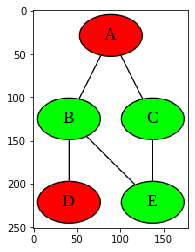

In [9]:
import pydotplus as ptp
import matplotlib.pyplot as plt


graph = ptp.Dot(graph_type='graph')
edges = [(1,2), (1,3), (2,4), (2,5), (3,5)]
nodes = [(1, "A", "red"), (2, "B", "green"), (3, "C", "green"), (4, "D", "red"), (5, "E", "green")]
for e in edges:
    graph.add_edge(ptp.Edge(e[0], e[1]))
for n in nodes:
    node = ptp.Node(name=n[0], label= n[1], fillcolor=n[2], style="filled" )
    graph.add_node(node)
graph.write_png("file.png")

plt.imshow(plt.imread("file.png"))
